In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
from qiskit_ibm_runtime.fake_provider import FakeTorino
from qiskit_aer.noise import NoiseModel

In [12]:
# Parameters
num_qubits = 5
shots = 1024
max_iterations = 100

In [13]:
# Backend fake Torino
fake_backend = FakeTorino()

# Simulator based on fake backend
simulator = AerSimulator.from_backend(fake_backend)

# Noise model
noise_model = NoiseModel.from_backend(fake_backend)

In [16]:
def create_crosstalk_circuit(iterations: int) -> QuantumCircuit:
    qc = QuantumCircuit(num_qubits, 1)
    qc.x(0)
    for _ in range(iterations):
        qc.id(0)
        qc.cx(1, 2)
        qc.cx(3, 4)
    qc.measure(0, 0)
    return qc

In [18]:
# Error search
error_iteration = None
final_counts = None
final_circuit = None

for i in range(1, max_iterations + 1):
    circuit = create_crosstalk_circuit(i)
    transpiled_circuit = transpile(circuit, backend=fake_backend, optimization_level=1)

    job = simulator.run(transpiled_circuit, shots=shots, noise_model=noise_model)
    result = job.result()
    counts = result.get_counts()

    error_rate = counts.get('0', 0) / shots

    if error_rate > 0.01:
        error_iteration = i
        final_counts = counts
        final_circuit = transpiled_circuit
        print(f"❌ Error detected after {i} iterations (error rate = {error_rate:.2%})")
        break

if error_iteration is None:
    final_circuit = transpiled_circuit
    final_counts = counts
    print(f"✅ No error detected after {max_iterations} iterations.")

❌ Error detected after 1 iterations (error rate = 7.32%)



📌 Quantum circuit:


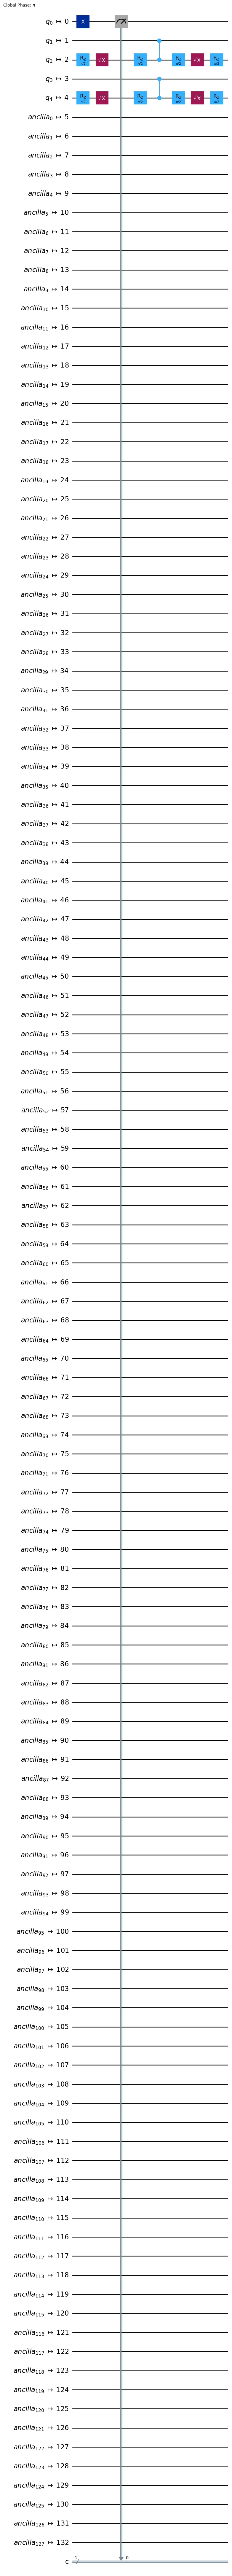

In [20]:
print("\n📌 Quantum circuit:")
final_circuit.draw(output='mpl')


❌ Błąd wykryty po 1 iteracjach (error rate = 4.98%)

📌 Obwód z ostatniej iteracji (po transpilacji):
📊 Histogram wyników pomiarów:


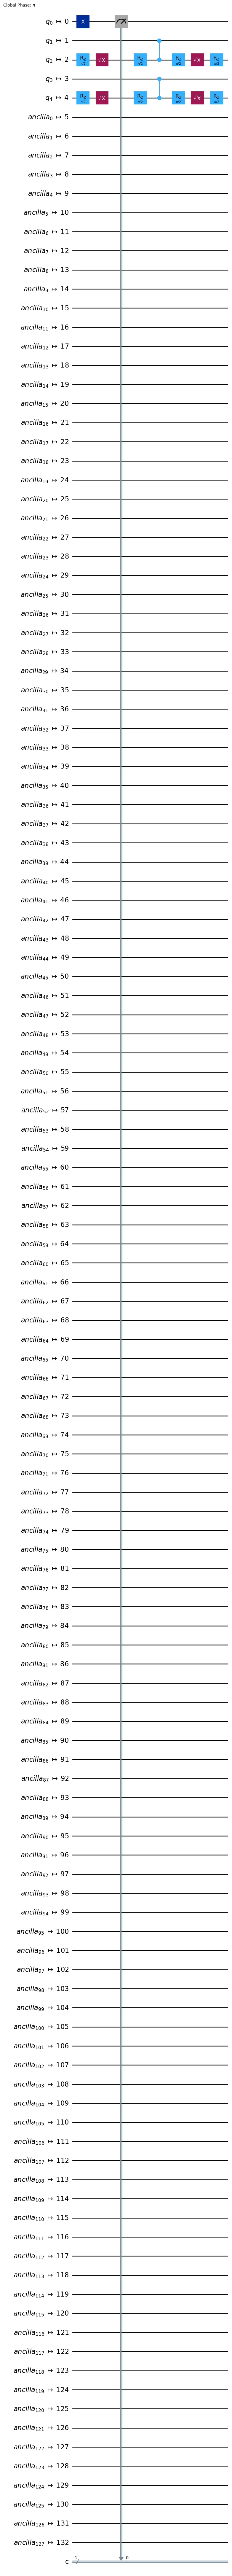

In [7]:
final_circuit.draw(output='mpl')